In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("churn_clean.csv")

In [3]:
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Univariate Statistics

In [4]:
data.groupby("Age").CaseOrder.count()

Age
18    126
19    154
20    130
21    136
22    144
     ... 
85    134
86    131
87    125
88    125
89    126
Name: CaseOrder, Length: 72, dtype: int64

<Axes: >

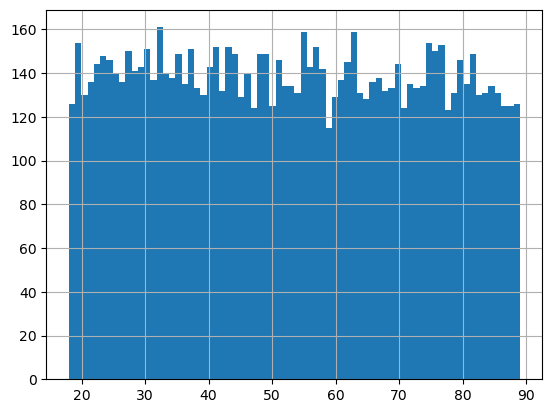

In [5]:
data.Age.hist(bins = 72)

In [6]:
data.Income.mean()

39806.926771

<Axes: >

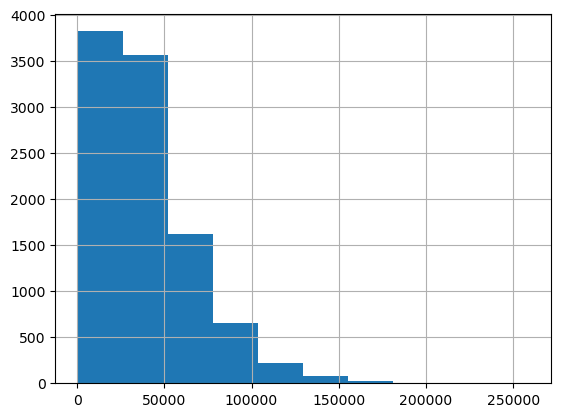

In [7]:
data.Income.hist()

In [8]:
data.groupby("Area").Population.count()

Area
Rural       3327
Suburban    3346
Urban       3327
Name: Population, dtype: int64

In [9]:
data_area = data.groupby("Area").Population.count().reset_index()
data_area

,Area,Population
0,Rural,3327
1,Suburban,3346
2,Urban,3327


<BarContainer object of 3 artists>

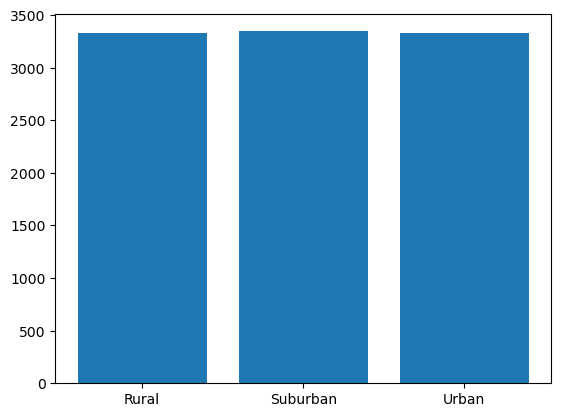

In [10]:
plt.bar(data_area.Area, data_area.Population)

In [11]:
data_churn = data.groupby("Churn").Population.count().reset_index()
data_churn

,Churn,Population
0,No,7350
1,Yes,2650


<BarContainer object of 2 artists>

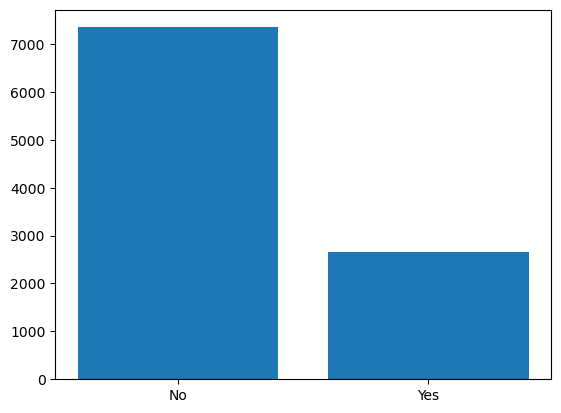

In [12]:
plt.bar(data_churn.Churn, data_churn.Population)

### Bivariate Statistics

In [13]:
table2 = pd.crosstab(
    data.Age,
    data.Income
)
table2

Income,348.67,368.50,630.24,643.20,644.32,740.66,901.21,938.81,945.47,951.96,...,186035.04,186156.60,189938.40,194550.70,196746.00,212255.30,220383.00,231252.00,256998.40,258900.70
Age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 10000 artists>

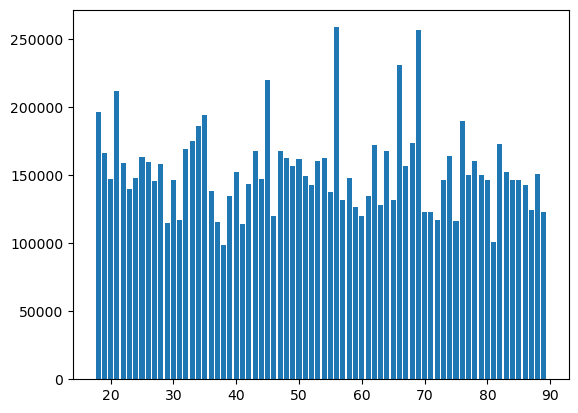

In [14]:
plt.bar(data.Age, data.Income)

In [15]:
table = pd.crosstab(
    data.Churn,
    data.Area
)
table

Area,Rural,Suburban,Urban
Churn,,,
No,2464,2473,2413
Yes,863,873,914


<Axes: xlabel='Churn', ylabel='Population'>

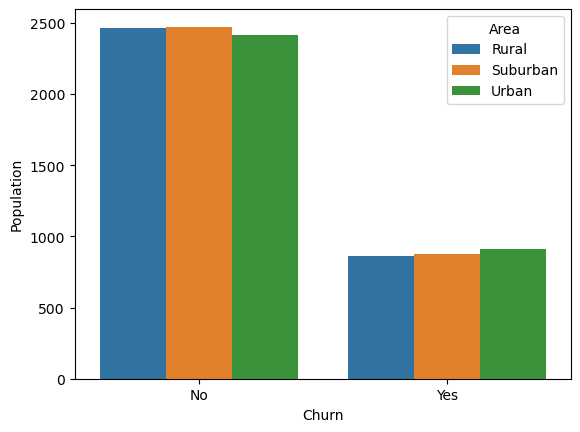

In [16]:
area_churn = data.groupby(["Churn","Area"]).Population.count().reset_index()
sns.barplot(x = area_churn.Churn,y= area_churn.Population , hue = area_churn.Area)

### T -Test

In [17]:
from scipy.stats import ttest_ind

In [18]:
test_data = data[["Income","Churn"]]
test_data.head()

,Income,Churn
0,28561.99,No
1,21704.77,Yes
2,9609.57,No
3,18925.23,No
4,40074.19,Yes


In [19]:
yes1 = test_data[test_data.Churn == "Yes"].Income
no1 = test_data[test_data.Churn == "No"].Income

In [20]:
ttest_ind(yes1,no1, equal_var = False)

Ttest_indResult(statistic=0.5880318477774708, pvalue=0.5565397731370642)